In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
n_sample = 100
X,y = make_circles(n_sample, noise=0.03, random_state=42)

In [ ]:
import pandas as pd

In [ ]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,-0.409572,-0.702664,1
1,0.758102,0.333609,1
2,-0.640866,0.488140,1
3,0.782127,-0.591145,0
4,0.773037,-0.718264,0


In [ ]:
circles.label.value_counts()

1    50
0    50
Name: label, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

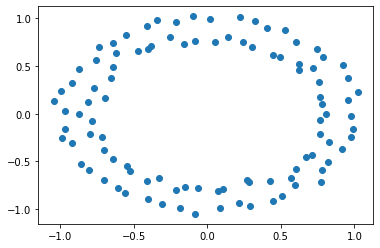

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer='sgd',
                metrics=['accuracy'])

In [ ]:
model_1.fit(X,y, epochs=5)

Epoch 1/5
4/4 [==============================] - 0s 3ms/step - loss: 4.3368 - accuracy: 0.4800
Epoch 2/5
4/4 [==============================] - 0s 3ms/step - loss: 4.1748 - accuracy: 0.4200
Epoch 3/5
4/4 [==============================] - 0s 3ms/step - loss: 3.6800 - accuracy: 0.4200
Epoch 4/5
4/4 [==============================] - 0s 3ms/step - loss: 2.9047 - accuracy: 0.4800
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 0.9646 - accuracy: 0.5000


In [ ]:
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

4/4 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4200


[0.6939988136291504, 0.41999998688697815]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) 
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X, y)

4/4 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5200


[0.6941444873809814, 0.5199999809265137]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  ## After TensorFlow 2.7.0 ##
  tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons with input_shape defined (None, 1) = look at 1 sample at a time
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data